<a href="https://colab.research.google.com/github/nowoclock/PM_data/blob/main/PM_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_1218.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> key, token의 차이


- API KEY : 인증이 불가능하다. public 데이터에 사용된다.
- API TOKEN : 개인 정보 등에 사용됨. (로그인)



# Pandas - 기본

In [ ]:
import pandas as pd

- 하나라도 실수가 들어가면 전체가 실수형으로 표시된다.

In [ ]:
data = {
    'name' : ['aa', 'ss', 'dd'],
    'age' : [15, 20, 10.5]
}

df = pd.DataFrame(data)
print(df)

  name   age
0   aa  15.0
1   ss  20.0
2   dd  10.5


In [ ]:
# 리스트활용 데이터 프레임 생성 코드

data = [
    {'name' : 'aa', 'age' : 15},
    {'name' : 'ss', 'age' : 20},
    {'name' : 'dd', 'age' : 10}
]

df = pd.DataFrame(data)
print(df)

  name  age
0   aa   15
1   ss   20
2   dd   10


## df 실습
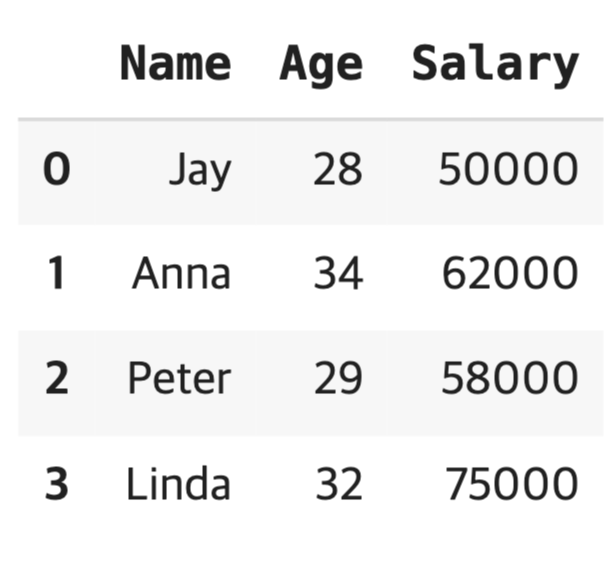

In [ ]:
data = {
    'name' : ['Jay', 'Anna', 'Peter', 'Linda'],
    'Age' : [28, 34, 29, 32],
    'Salay' : [50000, 62000, 58000, 75000]
}

df = pd.DataFrame(data)
print(df)

    name  Age  Salay
0    Jay   28  50000
1   Anna   34  62000
2  Peter   29  58000
3  Linda   32  75000


# 2. TMDB 영화 정보(Detail) 응답 데이터를 저장한 데이터프레임을 만드는 코드를 작성한다.

https://developer.themoviedb.org/reference/movie-details

- movie_id는 912649
- 아래 데이터를 저장한 데이터프레임을 만든다.
    - id
    - overview
    - title
    - release_date

In [ ]:
# .env 패키지
!pip install python-dotenv

In [ ]:
# api
from dotenv import load_dotenv
import os

In [ ]:
os.getenv('tmdb_api_token')

In [ ]:
import requests
from pprint import pprint

api_token = os.getenv('tmdb_api_token')

movie_id = 912649

base_url = 'https://api.themoviedb.org/3'
endpoint = f'/movie/{movie_id}'

url = base_url + endpoint

params = {
    'language' : 'ko-KR'

}

headers = {
    "accept": "application/json",
    "Authorization": f"Bearer {api_token}"
}

response = requests.get(url, headers=headers, params=params)
# print(response)
# pprint(response.json())

data = [{
    'id' : response.json()['id'],
    'overview' : response.json()['overview'],
    'title' : response.json()['title'],
    'release_date' : response.json()['release_date']
}]

df = pd.DataFrame(data)
print(df)

       id                                           overview       title  \
0  912649  환상의 케미스트리의 에디 브록과 그의 심비오트 베놈은 그들을 노리는 정체불명 존재의...  베놈: 라스트 댄스   

  release_date  
0   2024-10-22  


In [ ]:
import requests
from pprint import pprint
api_token = os.getenv('tmdb_api_token')


base_url = 'https://api.themoviedb.org/3'
endpoint = f'/movie/now_playing'

url = base_url + endpoint

params = {
    'language' : 'ko-KR'

}

headers = {
    "accept": "application/json",
    "Authorization": f"Bearer {api_token}"
}

response = requests.get(url, headers=headers, params=params).json()
# print(response)

movie_list = response['results']
print(type(movie_list))

data = []
for movie in movie_list:
    data.append({
        'id' : movie['id'],
        'overview' : movie['overview'],
        'title' : movie['title'],
        'release_date' : movie['release_date']
    })
print(len(data))
pprint(data)

<class 'list'>
20
[{'id': 845781,
  'overview': "크리스마스 D-1, 철통같은 보안을 뚫고 코드명 '레드 원' 산타클로스가 납치되고 크리스마스가 사라질 위기에 "
              "처했다! '레드 원'을 찾기 위해 사령관 '칼럼 드리프트'는 산타클로스 따위는 없다고 믿는 현상금 사냥꾼 '잭 "
              "오말리'와 협력하기로 한다. 시작부터 삐그덕 거리는 이들 앞에 크리스마스의 존재를 위협하는 위험천만한 적들이 "
              '나타나는데…',
  'release_date': '2024-10-31',
  'title': '레드 원'},
 {'id': 1241982,
  'overview': '바다를 누볐던 선조들에게서 예기치 못한 부름을 받은 모아나가 마우이와 다시 만나 새로운 선원들과 함께 오랫동안 '
              '잊혀진 멀고 위험한 바다 너머로 떠나는 특별한 모험을 담은 이야기',
  'release_date': '2024-11-21',
  'title': '모아나 2'},
 {'id': 1035048,
  'overview': '한 명의 싱글파더와 두 명의 여성이 어린 소년의 생명을 구하기 위해 집이라는 안전한 공간을 떠나 괴물 같은 '
              '생명체들과 맞서게 된다.',
  'release_date': '2024-11-07',
  'title': '엘리베이션'},
 {'id': 1138194,
  'overview': '콜로라도의 작은 마을을 방문한 두 명의 젊은 몰몬교 여성 선교사들이 주민에게 복음을 전파하기 위해 집집마다 방문 '
              '중에 매력적인 리드 씨라는 인물을 만나게 되고, 그의 집에서 예상치 못한 위험에 휩싸이게 된다.',
  'release_date': '2024-10-31',
  'title': '헤러틱'},
 {'id': 974453, 'overview': '', 'release_date': '2024-1

# csv 읽어오기

In [ ]:
import pandas as pd
pd.read_csv('/content/drive/MyDrive/PM_교육/winequality-red.csv')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## csv 내보내기

In [ ]:
data = [
    {'name' : 'aa', 'age' : 15},
    {'name' : 'ss', 'age' : 20},
    {'name' : 'dd', 'age' : 10}
]

df = pd.DataFrame(data)
df.to_csv('/content/drive/MyDrive/PM_교육/aaa.csv')

## open API 데이터를 데이터 프레임으로 만들고 csv파일로 저장

In [ ]:
# .env 패키지
!pip install python-dotenv

In [67]:
# api 불러오기
from dotenv import load_dotenv
import os

In [ ]:
# 환경 변수로 가져오는 것이기 때문에 변수명 지정 X
os.getenv('open_api_key')

In [ ]:
import pandas as pd

In [ ]:
import requests
from pprint import pprint

serviceKey = os.getenv('open_api_key')

base_url = 'http://apis.data.go.kr/B551177/StatusOfPassengerWorldWeatherInfo'
end_point = '/getPassengerArrivalsWorldWeather'

request_url = base_url + end_point
# print(request_url)

params ={
    'serviceKey' : {serviceKey},
    'numOfRows' : '10',
    'pageNo' : '1',
    'from_time' : '0000',
    'to_time' : '2400',
    'airport' : '',
    'flight_id' : '',
    'airline' : '',
    'lang' : 'K',
    'type' : 'json',
    }

# API 요청
response = requests.get(request_url, params=params)

response_python = response.json()
item = response_python['response']['body']['items']
data = []
for i in item:
    data.append({
        'airline' : i['airline'],
        'airport' : i['airport'],
    })
df = pd.DataFrame(data)
#print(df)
df.to_csv('/content/drive/MyDrive/PM_교육/airline.csv')

# dataframe_info

- 레드와인 데이터셋 불러와서 .속성

In [ ]:
# 불러오기
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/PM_교육/winequality-red.csv')

### .dtypes = 데이터 타입

In [ ]:
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


### .info() = 종합정보

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### .index = 행 이름

In [ ]:
df.index
# start = 시작 , stop = 끝, step = 범위

RangeIndex(start=0, stop=1599, step=1)

### .columns = 열의 이름

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# 정렬

## 오름차순, 내림차순 정렬
    > sort_Values(by=[ ]) : 열의 값을 기준으로 정렬
    > sort_insex() : 행의 이름(인덱스, index)을 기준으로 정렬
- by : 어떤 열을 기준으로
- sort : 오름차순
- ascending = True : 오름차순
- ascending = False : 내림차순

In [ ]:
# 오름차순
df.sort_values(by='pH', ascending = True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
544,14.3,0.310,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6
614,9.2,0.755,0.18,2.2,0.148,10.0,103.0,0.99690,2.87,1.36,10.2,6
440,12.6,0.310,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
1470,10.0,0.690,0.11,1.4,0.084,8.0,24.0,0.99578,2.88,0.47,9.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
695,5.1,0.470,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,6
1316,5.4,0.740,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6


In [ ]:
# 내림차순
df.sort_values(by='quality', ascending = False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.330,0.33,1.70,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.420,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3


In [ ]:
# n가지 기준 오름차순, 내림차순
sorted_df = df.sort_values(by=['pH', 'alcohol', 'quality'], ascending=[True, False, True])
sorted_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
544,14.3,0.310,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6
614,9.2,0.755,0.18,2.2,0.148,10.0,103.0,0.99690,2.87,1.36,10.2,6
440,12.6,0.310,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
1470,10.0,0.690,0.11,1.4,0.084,8.0,24.0,0.99578,2.88,0.47,9.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
695,5.1,0.470,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,6
1316,5.4,0.740,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6


# Titanic 데이터 확인하기

1. 아래 파일을 읽어서 데이터프레임을 생성한다.
    
    [titanic.csv](https://prod-files-secure.s3.us-west-2.amazonaws.com/f2678325-6f7b-4a25-b188-86c42030d6d5/63003e86-b43e-4b29-9a55-1b2ad8dcd0e7/titanic.csv)
    
2. 타이타닉 데이터의 정보를 확인한다.
    - 데이터의 첫 5행을 출력한다.
    - 행과 열의 수를 출력한다.
    - 각 열의 데이터 타입을 출력한다
    - 인덱스 정보를 출력한다.
    - 열 이름 정보를 출력한다.
    - 기본 통계 정보를 출력한다.
3. 나이 `age` 를 기준으로 오름차순으로 정렬하고, 출력한다.
4. 티켓 요금 `fare` 을 기준으로 내림차순으로 정렬하고, 출력한다.
5. 객실 등급 `Pclass` 기준 오름차순, 나이 `Age` 기준 오름차순으로 정렬하고, 출력한다.

# [과제]

- 자신의 Open API 데이터의 정보 3개를 확인하는 코드를 작성한다.
- 자신의 Open API 데이터를 정렬하는 코드를 3개 작성한다.
    - sort_values() 활용


In [75]:
serviceKey = os.getenv('open_api_key')

base_url = 'http://apis.data.go.kr/B551177/StatusOfPassengerWorldWeatherInfo'
end_point = '/getPassengerArrivalsWorldWeather'

request_url = base_url + end_point
# print(request_url)

params ={
    'serviceKey' : {serviceKey},
    'numOfRows' : '10',
    'pageNo' : '1',
    'from_time' : '0000',
    'to_time' : '2400',
    'airport' : '',
    'flight_id' : '',
    'airline' : '',
    'lang' : 'K',
    'type' : 'json',
    }

# API 요청
response = requests.get(request_url, params=params)

response_python = response.json()
item = response_python['response']['body']['items']
data = []
for i in item:
    data.append({
        'airline' : i['airline'],
        'airport' : i['airport'],
        'airportCode' : i['airportCode']

    })
df = pd.DataFrame(data)
#df
solted_name = df.sort_values(by=['airline', 'airport', 'airportCode'])
solted_name

,airline,airport,airportCode
5,대한항공,밴쿠버,YVR
4,대한항공,장가계,DYG
3,비엣젯항공,나트랑,CXR
1,비엣젯항공,푸꾸옥,PQC
2,비엣젯항공,푸꾸옥,PQC
7,비엣젯항공,푸꾸옥,PQC
8,아시아나항공,도쿄/하네다,HND
6,웨스트젯,밴쿠버,YVR
9,전일본공수 주식회사,도쿄/하네다,HND
0,콴타스항공,시드니,SYD
